# cracking model example
This example demonstrates the following steps:

+ raw parameter data
+ initialize model: corrosion model, section loss model
+ run model: deterministic, stochastic 
+ post-process model results

In [1]:
%matplotlib inline

# Import necessary modules and cracking model class
from rational_rc.cracking import CrackingModel
import rational_rc.math_helper as mh

import matplotlib.pyplot as plt

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Define raw parameters for the cracking model
class Param: 
    pass

raw_pars = Param()

# Material properties
r0_bar_mean = 5e-3           # Rebar diameter, mean [m]
f_t_mean = 5.                # Concrete ultimate tensile strength, mean [MPa]
E_0_mean = 32e3              # Concrete modulus of elasticity mean [MPa]

# Rebar section loss and cover thickness
x_loss_mean = 12.5e-6 * 0.6  # Rebar section loss, mean [m]
cover_mean = 4e-2            # Cover thickness, mean [m]

# Generate distributions for the material and geometric properties
raw_pars.r0_bar = mh.normal_custom(r0_bar_mean, 0.1 * r0_bar_mean, non_negative=True)  
raw_pars.x_loss = mh.normal_custom(x_loss_mean, 0.1 * x_loss_mean, non_negative=True)  # Can be derived from the corrosion model
raw_pars.cover = mh.normal_custom(cover_mean, 0.1 * cover_mean, non_negative=True)
raw_pars.f_t = mh.normal_custom(f_t_mean, 0.1 * f_t_mean, non_negative=True)
raw_pars.E_0 = mh.normal_custom(E_0_mean, 0.1 * E_0_mean, non_negative=True)
raw_pars.w_c = mh.normal_custom(0.5, 0.1 * 0.6, non_negative=True)  # Water/cement ratio

# Rust volumetric expansion rate, beta distribution
raw_pars.r_v = mh.beta_custom(2.96, 2.96 * 0.05, 3.3, 2.6)  # Mean = 2.96, lower = 2.6, upper = 3.3


deterministic


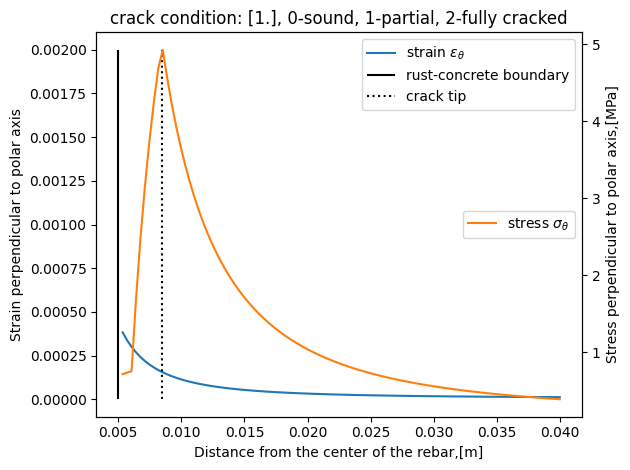

In [3]:
# Initialize the cracking model with the defined parameters
model_crack = CrackingModel(raw_pars)

# Run the model in deterministic mode to check the stress and strain distribution
# The deterministic mode will provide a stress-strain diagram to verify the results
model_crack.run(stochastic=False, plot_deterministic_result=True)


In [4]:
# Run the cracking model in stochastic mode to account for randomness in material properties and conditions
model_crack.run(stochastic=True)

# Post-process and analyze the results
model_crack.postproc()

# print some derived results in their raw form:

# Display the rate of visible cracks (from stochastic run)
print("Crack visible rate count:", model_crack.crack_visible_rate_count)

# Calculate and display the normalized crack length (crack length divided by cover thickness)
normalized_crack_length = (model_crack.R_c - model_crack.pars.r0_bar) / model_crack.pars.cover
print("Normalized crack length (crack length / cover):", normalized_crack_length)


Crack visible rate count: 0.0
Normalized crack length (crack length / cover): [0.19054513        nan        nan ... 0.08077327 0.13740441 0.08711361]


Probability of visible surface crack: 0.0


<Figure size 640x480 with 0 Axes>

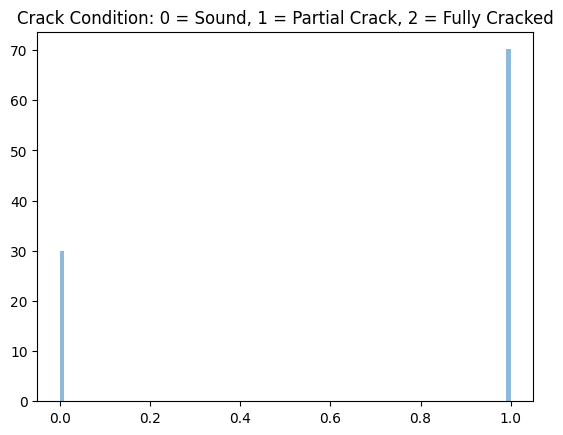

In [5]:
# Plot the crack condition histogram
plt.figure()
mh.hist_custom(model_crack.crack_condition)
plt.title('Crack Condition: 0 = Sound, 1 = Partial Crack, 2 = Fully Cracked')

# Display the probability of visible surface cracks
print('Probability of visible surface crack:', model_crack.crack_visible_rate_count)


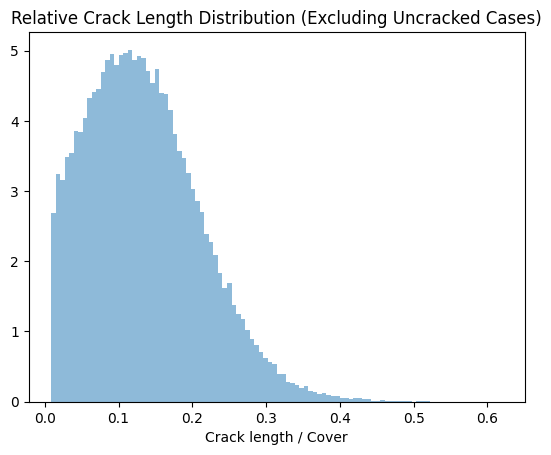

In [6]:
# Histogram of the relative crack length through the cover, excluding uncracked cases
mh.hist_custom(model_crack.crack_length_over_cover[model_crack.crack_length_over_cover != 0])

# Set the x-axis label to indicate relative crack length
plt.xlabel('Crack length / Cover')
plt.title('Relative Crack Length Distribution (Excluding Uncracked Cases)')
plt.show()
